## 思维⽅式 - 01 基于规则引擎 Rule Enginee Based

最直接的方法-随机从句子库中选择

In [1]:
import random
def random_output(string):
    return random.choice(string.split('|')).strip()

In [2]:
random_output('您好 | 您来啦 | 快请进')

'您来啦'

一个简单的语法规则
>hello_rules = ''' 
say_hello = names hello tail  
names = name names | name 
name = Jhon | Mike | ⽼梁 | ⽼刘  
hello = 你好 | 您来啦 | 快请进 
tail = 呀 | ！ 
'''

In [3]:
def tail():
    return random_output('呀 | ！')
def hello():
    return random_output('您好 | 您来啦 | 快请进')
def name():
    return random_output('John | Mike | 老梁 | 老刘')
def names():
    pro = random.random()
    if pro < 0.5:
        return name() + '，' + names()
    else:
        return name()
def say_hello():
    return names() + '，' + hello() + tail()

In [4]:
names()

'老梁，老刘'

In [5]:
say_hello()

'老梁，Mike，老梁，老梁，老刘，您好！'

语法变更？
使用可选择的语法规则！

In [6]:
# 通过语法规则生成目标语句
def get_generation_by_gram(grammar_str: str, target, stmt_split='=', or_split='|'):
   rules = dict() # key is the @statement, value is @expression 
   #解析语法规则，创建规则字典
   for line in grammar_str.split('\n'): 
       if not line: continue 
       # skip the empty line 
     #  print(line) 
       stmt, expr = line.split(stmt_split) 
    
       rules[stmt.strip()] = expr.split(or_split) 
   # 根据规则字典生成目标语句
   generated = generate(rules, target=target) 
    
   return generated

In [7]:
# 根据规则字典生成目标语句
def generate(grammar_rule, target): 
   if target in grammar_rule: # names  
       candidates = grammar_rule[target]  # ['name names', 'name'] 
       candidate = random.choice(candidates) #'name names', 'name' 
       return ''.join(generate(grammar_rule, target=c) for c in candidate.split()) 
   else: 
       return target

In [8]:
# 创建语法规则1
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  ⼀个 | 这个
noun =>   ⼥⼈ |  篮球 | 桌⼦ | ⼩猫
verb => 看着   |  坐在 |  听着 | 看⻅
Adj =>   蓝⾊的 |  好看的 | ⼩⼩的"""

In [9]:
# 创建语法规则2
grammar_2 = """
say_hello = names hello tail 
names = name names | name
name = Jhon | Mike | ⽼梁 | ⽼刘 
hello = 你好 | 您来啦 | 快请进
tail = 呀 | ！
"""

In [10]:
# 根据语法规则1生成目标语句
# target = 'sentence'
# sentence 属于 simple_grammar
get_generation_by_gram(simple_grammar, target='sentence', stmt_split='=>')

'⼀个⼩⼩的好看的好看的⼥⼈看⻅⼀个⼩⼩的蓝⾊的好看的⼥⼈'

In [11]:
# 根据语法规则2生成目标语句
# target = 'say_hello'
# sentence 属于 grammar_2
get_generation_by_gram(grammar_2, target='say_hello', stmt_split='=')

'Jhon你好！'

增加更多好玩的例子！

[《四时山水诗》](https://zhidao.baidu.com/question/1609924281471295747.html)

In [12]:
grammar_season="""
season = spring_str , summer_str , autumn_str , winter_str
spring_str = spring spring spring spring spring spring spring
summer_str = summer summer summer summer summer summer summer
autumn_str = summer summer summer summer summer summer summer
winter_str = winter winter winter winter winter winter winter
spring = 莺|啼|岸|柳|弄|春|晴|夜|月|明
summer = 香|莲|碧|水|动|风|凉|夏|日|长
autumn = 秋|江|楚|雁|宿|沙|洲|浅|水|流
winter = 红|炉|透|炭|炙|寒|风|御|隆|冬
"""

In [13]:
get_generation_by_gram(grammar_season, target='season', stmt_split='=')

'岸柳弄月弄柳莺,凉香动风水水凉,动风凉水香日碧,御冬炭红隆炭寒'

In [14]:
grammar_loop = """
word_loop = a_str
a1 = 山|黄
a2 = 东|山
a3 = 运|落
a4 = 粮|叶
a5 = 车|松
a_str = a1 a2 a3 a4 a5 a4 a3 a2 a1
"""
# 黄山落叶松叶落山黄; 前门出租车租出门前; 中国出人才人出国中; 天上人世情世人上天; 楼上步轻盈轻步上楼

In [15]:
get_generation_by_gram(grammar_loop, target='word_loop', stmt_split='=')

'山东落粮松粮落东黄'

编程语言（形式化语言、正则语言）

In [16]:
simpel_programming = '''
programming => if_stmt | assign | while_loop
while_loop => while ( cond ) { change_line stmt change_line }
if_stmt => if ( cond )  { change_line stmt change_line }
change_line => /N
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  char var | char | _ char _ var 
char => a | b |  c | d | 0 | 1 | 2 | 3
'''

In [17]:
for i in range(10): 
   print(get_generation_by_gram(simpel_programming, target='stmt', stmt_split='=>'))

if(d_b__0_bac==0_c_b_a__a_0){/Nif(a<=_0_30_1_2){/Nif(aa==3){/Nif(_2__c_a>=3){/Nc=1/N}/N}/N}/N}
if(a_3__1_03c<=0){/Nif(_3_d0==a_3__a__0_dc){/Nif(dc0_d_3){/Nif(_2_c30c_3_a<=_1_bd2){/Nif(_a_c==_b_2){/Nif(31_a_2>=ba){/Nif(c>=d1cb){/Nif(0<=a){/N_0_b_2_0=b/N}/N}/N}/N}/N}/N}/N}/N}
if(2d){/Nif(d2b_2__0__3_d){/Nd3=2_c_b/N}/N}
b=_1_31_b__3_2
d=b1
if(b1<11_b_11_2_c0){/Nif(a_3_0b<=a){/Nif(_3_aa==_1__1_2b_1__d_3){/Nif(20b_1_a_c_2_b_d_b_2ab_0_b){/N2=d_0_0_1_a_b__2_b/N}/N}/N}/N}
0b=_c_1
0_c_b=a
if(2>=c){/Nif(_3_c<0){/Nif(ca>=_a_ca){/N_a__a_0=330/N}/N}/N}
if(_3_30<_0_d){/N_a__a_3=3/N}


In [18]:
def pretty_print(line): 
   lines = line.split('/N') 
    
   for i, sen in enumerate(lines): 
       if i < len(lines) / 2:  
           print(i * "  ", sen) 
       else: 
           print((len(lines) - i) * " ", sen)

In [60]:
for i in range(10): 
   pretty_print(get_generation_by_gram(simpel_programming, target='programming', stmt_split='=>'))

 2=_1_d
 _0__2__a__d_b2=0
 b0=0
 _a_d_2_23=cc
 d_0_00=a
 while(0_a__b_03){
   if(b<_d_b){
     if(3<=_3_33_0_a){
       cd=cb
    }
   }
  }
 _c__d_a=_2__d_3_0__d__1__1_0
 while(_d__1_d==d){
   if(_2_a303<=_0_2){
     2=_2__b_c3
   }
  }
 3=b
 1=b_c_3


## 思维⽅式 - 02 基于概率 Probability Model Based

```
Language Model
-> Input: Sentence (w1..wn)
-> Output: Pribability(0 - 1)
```

In [2]:
import jieba
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [80]:
corpus = '80k_articles.txt'

In [25]:
# 'url=https://github.com/Computing-Intelligence/jupyters_and_slides/blob/master/2019-autumn/article_9k.txt'
# corpus = 'article_9k.txt'

In [81]:
FILE = open(corpus,encoding='utf-8').read()
len(FILE)

34475997

In [82]:
FILE[:500]

'新华社照片，东莞（广东），2017年4月7日\\n（体育）（9）篮球——CBA总决赛第四场：广东对阵新疆\\n4月7日，广东东莞银行队球员易建联在比赛中扣篮。\\n当日，在2016-2017赛季中国男子篮球职业联赛（CBA）总决赛第四场比赛中，广东东莞银行队主场迎战新疆喀什古城队。\\n新华社记者孟永民摄\\n\u3000\u3000新华社北京４月１４日新媒体专电（记者杨烨）作为国民经济的重要支柱，央企一季度交上了一份漂亮的“成绩单”。国资委总会计师沈莹在１３日国新办新闻发布会上表示，一季度中央企业累计实现利润总额３１２０亿元，同比增长２３．２％，３月当月利润总额达到历史同期最好水平，１０２家中央企业中有９９家盈利，８１家企业增利，４３家企业效益增幅超过１０％，一些长期亏损的企业实现扭亏为盈。\\n\u3000\u3000值得注意的是，她同时透露了下一步央企改革重点，国资委将加快推动中央企业战略性重组，加快钢铁、煤炭、煤化工等业务的专业化整合。\\n\u3000\u3000“一季度中央企业累计实现净利润２２６４．２亿元，同比增长２６．５％，其中归属于母公司所有者的净利润１２０２．７亿元，同比增长２４．６％。”沈莹告诉记者，其中，石油石化、钢铁、有色、煤炭等传'

In [29]:
def generate_by_pro(text_corpus, length=20): 
   return ''.join(random.sample(text_corpus, length))

In [30]:
generate_by_pro(FILE)

'自进胜思会主奇信一主，民牢人外制实善平主'

使用 jiaba 分词

In [111]:
# 测试 分词 效果
list(jieba.cut('⼀加手机5要做市面最轻薄'))

['⼀', '加', '手机', '5', '要', '做', '市面', '最', '轻薄']

In [108]:
max_length = 10000000 
sub_file = FILE[:max_length]

In [109]:
def cut(string): 
   return list(jieba.cut(string))

In [110]:
# 分词
TOKENS = cut(sub_file)

In [112]:
len(TOKENS)

5965001

In [113]:
# 统计每个词出现次数，生成字典 {key=word,value=count}
words_count = Counter(TOKENS)

In [114]:
# 最常见的20个词
words_count.most_common(20)

[('，', 350057),
 ('的', 182735),
 ('\\', 173600),
 ('。', 163393),
 ('n', 159606),
 ('\u3000', 103322),
 ('、', 76900),
 ('在', 67951),
 ('”', 62199),
 ('“', 62184),
 ('）', 57931),
 ('（', 57841),
 ('月', 48374),
 ('日', 43620),
 ('新华社', 36308),
 ('和', 34665),
 ('年', 32160),
 ('了', 31605),
 ('—', 28948),
 ('：', 27180)]

In [115]:
# 常用词出现次数
words_with_fre = [f for w, f in words_count.most_common()]

In [116]:
words_with_fre[:10]

[350057, 182735, 173600, 163393, 159606, 103322, 76900, 67951, 62199, 62184]

常用词的出现频率断崖式下跌

- 在大量的文本中，出现次数第二多的单词，
- 它出现的概率是，出现频率最高的单词的1/2, 
- 出现频率第三高的单词，频率是最高的单词的 1/3， 1000 => 1/1000

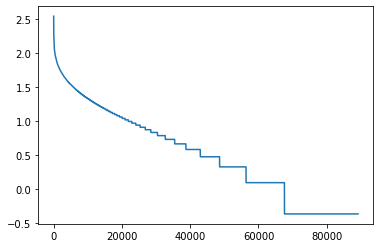

In [117]:
# 两次 log 操作后还是下降得很快
plt.plot(np.log(np.log(words_with_fre)))

相邻2个单词相连（用于计算相邻2个单词出现概率）

In [118]:
_2_gram_words = [ 
   TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS)-1)
]

In [119]:
_2_gram_words[:10]

['新华社照片', '照片，', '，东莞', '东莞（', '（广东', '广东）', '），', '，2017', '2017年', '年4']

In [120]:
_2_gram_word_counts = Counter(_2_gram_words)

2-gram langauge model 

In [121]:
def get_2_gram_count(word): 
   if word in _2_gram_word_counts: return _2_gram_word_counts[word] 
   else: 
       return _2_gram_word_counts.most_common()[-1][-1]

In [122]:
def get_gram_count(word, wc): 
   if word in wc: return wc[word] 
   else: 
       return wc.most_common()[-1][-1]

In [123]:
get_gram_count('XXX',words_count)

3

In [124]:
get_gram_count('XXX', _2_gram_word_counts)

1

In [125]:
# 2-gram langauge model 
def two_gram_model(sentence): 
   
   tokens = cut(sentence) 
    
   probability = 1 
    
   for i in range(len(tokens)-1): 
       word = tokens[i] 
       next_word = tokens[i+1] 
        
       _two_gram_c = get_gram_count(word+next_word, _2_gram_word_counts) 
       _one_gram_c = get_gram_count(next_word, words_count) 
       pro =  _two_gram_c / _one_gram_c 
        
       probability *= pro 
    
   return probability   

In [126]:
# 使用模型预测某句话的出现概率
two_gram_model('贯彻落实党的十九大精神')

1.104131257488056e-10

In [127]:
two_gram_model('推进国家治理体系和治理能力现代化的重大意义和总体要求')

1.1006394961852739e-28

In [128]:
two_gram_model('推进国家治理体系和治理能力现代化的重大意义和大纲要求')

6.889187957604122e-28

In [129]:
two_gram_model('此外⾃本周6⽉12⽇起除⼩⽶⼿机6等15款机型')

2.537191929295796e-26

In [130]:
two_gram_model('前天早上吃晚饭的时候')

5.489450605128323e-09

比较两句话，判断哪句为真的可能性大

In [131]:
need_compared = [ 
   "这个人来自秦华⼤学 这个人来自清华⼤学", 
   "今天晚上请你吃大餐，我们⼀起吃日料 明天晚上请你吃大餐，我们⼀起吃苹果", 
   "真事⼀只好看的⼩猫 真是⼀只好看的⼩猫", 
   "今晚我去吃⽕锅 今晚⽕锅去吃我", 
   "洋葱奶昔来⼀杯 养乐多绿来⼀杯"
]

In [132]:
for s in need_compared: 
   s1, s2 = s.split() 
   p1, p2 = two_gram_model(s1), two_gram_model(s2) 
    
   better = s1 if p1 > p2 else s2 
    
   print('{} is more possible'.format(better)) 
   print('-'*4 + ' {} with probility {}'.format(s1, p1)) 
   print('-'*4 + ' {} with probility {}'.format(s2, p2))

这个人来自秦华⼤学 is more possible
---- 这个人来自秦华⼤学 with probility 1.617392805380646e-08
---- 这个人来自清华⼤学 with probility 2.7886082851390446e-10
今天晚上请你吃大餐，我们⼀起吃日料 is more possible
---- 今天晚上请你吃大餐，我们⼀起吃日料 with probility 8.763017747014153e-24
---- 明天晚上请你吃大餐，我们⼀起吃苹果 with probility 6.06437214326239e-26
真是⼀只好看的⼩猫 is more possible
---- 真事⼀只好看的⼩猫 with probility 6.74512508718887e-14
---- 真是⼀只好看的⼩猫 with probility 3.500719920251023e-11
今晚⽕锅去吃我 is more possible
---- 今晚我去吃⽕锅 with probility 3.9443916315057427e-10
---- 今晚⽕锅去吃我 with probility 2.7112761977062603e-07
养乐多绿来⼀杯 is more possible
---- 洋葱奶昔来⼀杯 with probility 1.0918508619070705e-06
---- 养乐多绿来⼀杯 with probility 0.003236245954692557


练习：结合第⼀种和第二种思路
- ⽣成大量的语句，使用语言模型获得最像"⼈话"的!

In [133]:
generate_sentences = {}
# 100消时太久，改为10
for i in range(10):
    sentence = get_generation_by_gram(simple_grammar, target='sentence', stmt_split='=>')
    generate_sentences[sentence] = two_gram_model(sentence)

In [144]:
sentence_list = list(generate_sentences.keys())
prob_list = list(generate_sentences.values())
max_prob = max(prob_list)
max_index = prob_list.index(max_prob)
max_sentence = sentence_list[max_index]
print(sentence_list)
print('\n最像人话的句子出现概率为：{}\n{}'.format(max_prob,max_sentence))

['⼀个好看的篮球听着这个好看的桌⼦', '⼀个好看的蓝⾊的桌⼦听着⼀个蓝⾊的篮球', '这个好看的桌⼦看⻅这个蓝⾊的蓝⾊的好看的⼥⼈', '这个好看的好看的蓝⾊的⼩猫听着⼀个⼩⼩的好看的好看的篮球', '⼀个蓝⾊的蓝⾊的⼩猫看⻅⼀个好看的⼩猫', '⼀个好看的⼩猫看⻅⼀个⼩⼩的⼩猫', '这个蓝⾊的⼩⼩的篮球看着这个蓝⾊的篮球', '这个⼩⼩的篮球看⻅这个好看的⼩猫', '这个⼩⼩的蓝⾊的⼩猫坐在这个好看的蓝⾊的桌⼦', '⼀个好看的桌⼦看着这个蓝⾊的蓝⾊的⼥⼈', '⼀个蓝⾊的⼩⼩的好看的⼥⼈看着⼀个好看的⼩猫', '⼀个蓝⾊的⼥⼈看着⼀个好看的⼩猫', '这个蓝⾊的⼥⼈听着这个⼩⼩的桌⼦', '这个蓝⾊的蓝⾊的⼥⼈看⻅这个好看的蓝⾊的⼩猫', '⼀个好看的⼩⼩的篮球看着这个好看的好看的⼩猫', '⼀个⼩⼩的⼥⼈听着⼀个好看的蓝⾊的桌⼦', '这个好看的蓝⾊的蓝⾊的桌⼦看⻅⼀个⼩⼩的好看的⼩⼩的篮球', '⼀个好看的桌⼦坐在⼀个好看的蓝⾊的篮球', '⼀个好看的⼥⼈坐在这个蓝⾊的⼩⼩的蓝⾊的蓝⾊的桌⼦', '这个蓝⾊的好看的好看的⼥⼈坐在这个⼩⼩的蓝⾊的⼩⼩的好看的蓝⾊的蓝⾊的⼥⼈', '⼀个蓝⾊的好看的蓝⾊的⼩⼩的⼩猫坐在这个蓝⾊的桌⼦', '⼀个蓝⾊的篮球看着⼀个⼩⼩的蓝⾊的好看的⼩⼩的篮球', '这个⼩⼩的篮球看着⼀个⼩⼩的⼩⼩的蓝⾊的蓝⾊的蓝⾊的桌⼦', '这个蓝⾊的蓝⾊的⼩猫坐在⼀个好看的⼩⼩的⼥⼈', '⼀个⼩⼩的好看的⼥⼈看⻅⼀个蓝⾊的⼩⼩的蓝⾊的好看的桌⼦', '这个⼩⼩的蓝⾊的⼩猫坐在⼀个⼩⼩的好看的蓝⾊的蓝⾊的篮球', '这个⼩⼩的篮球听着⼀个好看的⼩猫', '⼀个好看的⼥⼈看着⼀个好看的⼩⼩的蓝⾊的⼩⼩的好看的好看的好看的蓝⾊的蓝⾊的⼥⼈', '这个蓝⾊的好看的蓝⾊的⼥⼈看⻅⼀个⼩⼩的蓝⾊的⼥⼈', '这个蓝⾊的好看的⼩⼩的⼩⼩的桌⼦看⻅这个好看的蓝⾊的好看的⼩猫', '⼀个蓝⾊的⼩猫坐在这个⼩⼩的桌⼦', '⼀个蓝⾊的好看的⼥⼈听着这个⼩⼩的好看的好看的⼩⼩的好看的篮球', '这个好看的蓝⾊的篮球看着⼀个⼩⼩的⼥⼈', '⼀个⼩⼩的⼥⼈坐在⼀个好看的桌⼦', '这个⼩⼩的好看的⼩猫看⻅⼀个⼩⼩的好看的蓝⾊的蓝⾊的蓝⾊的好看的好看的篮球', '这个⼩⼩的⼥⼈看着这个⼩⼩的⼩⼩的篮球', '⼀个好看的⼩⼩的⼥⼈听着⼀个蓝⾊的蓝⾊的蓝⾊的⼩猫'

In [ ]:
## 第三种思维⽅式 基于搜索的 Search Problem Solving

In [36]:
import re
import math
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
from collections import defaultdict

In [146]:
# 测试正则库
l = "color or colour"
pattern = re.compile("colou?r")
pattern.findall(l)

['color', 'colour']

In [149]:
re.findall("[A-Z]",l)

[]

In [27]:
# 城市经纬度-源数据
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
//{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}"""

In [28]:
# line = """{name:'兰州', geoCoord:[103.73, 36.03]},"""
# line = """//{name:'嘉峪关', geoCoord:[98.17, 39.47]},"""
line = """{name:'长春', geoCoord:[125.35, 43.88]},"""
city = re.findall("name:'(\w+)'",line)[0] 
x_y = re.findall("geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
x_y = tuple(map(float,x_y))
print(city,x_y)

长春 (125.35, 43.88)


In [31]:
# 生成城市经纬度字典
def get_city_info(city_coordination): 
   city_location = {} 
   for line in city_coordination.split("\n"): 
       if line.startswith("//"): continue 
       if line.strip() == "":continue 
       # print(line)     
       city = re.findall("name:'(\w+)'",line)[0] 
       x_y = re.findall("geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0] 
       x_y = tuple(map(float,x_y)) 
       city_location[city] = x_y 
   return city_location

In [32]:
city_info = get_city_info(coordination_source)
city_info

{'兰州': (103.73, 36.03),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '拉萨': (102.73, 25.04),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

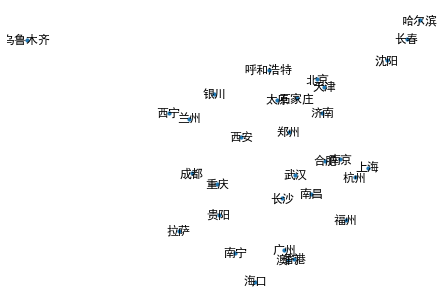

In [37]:
# 绘制城市地图
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys())) 
nx.draw(city_graph, city_info, with_labels=True, node_size=10)

In [38]:
# 计算两地(经纬度)的地理距离
def geo_distance(origin, destination): 
   """
   Calculate the Haversine distance.
   Parameters
   ----------
   origin : tuple of float
       (lat, long)
   destination : tuple of float
       (lat, long)
   Returns
   -------
   distance_in_km : float
   Examples
   --------
   >>> origin = (48.1372, 11.5756)  # Munich
   >>> destination = (52.5186, 13.4083)  # Berlin
   >>> round(distance(origin, destination), 1)
   504.2
   """ 
   lat1, lon1 = origin 
   lat2, lon2 = destination 
   radius = 6371  # km
   dlat = math.radians(lat2 - lat1) 
   dlon = math.radians(lon2 - lon1) 
   a = (math.sin(dlat / 2) * math.sin(dlat / 2) + 
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * 
        math.sin(dlon / 2) * math.sin(dlon / 2)) 
   c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a)) 
   d = radius * c
   return d
# 计算两个城市的地理距离
def get_city_distance(city1,city2): 
   return geo_distance(city_info[city1],city_info[city2])

In [39]:
get_city_distance("杭州","上海")

153.5185697155768

In [40]:
# 建立城市间连接拓扑图
threshold = 700   # defined the threshold
def build_connection(city_info): 
   cities_connection = defaultdict(list) 
   cities = list(city_info.keys()) 
   for c1 in cities: 
       for c2 in cities: 
           if c1 == c2 : continue 
            
           if get_city_distance(c1,c2) < threshold: 
               cities_connection[c1].append(c2) 
   return cities_connection

In [41]:
# 建立城市间连接拓扑图
cities_connection = build_connection(city_info)

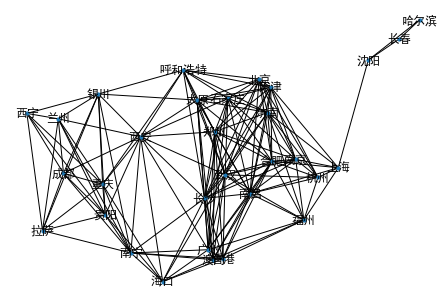

In [42]:
# 绘制城市间连接拓扑图
cities_connection_graph = nx.Graph(cities_connection)
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=10)

In [43]:
# 搜索导航路径-1
def search_1(graph,start,destination): 
   pathes = [[start]] 
   visited = set() 
    
   while pathes: 
       path = pathes.pop(0) 
       froniter = path[-1] 
        
       if froniter in visited: continue 
            
       successsors = graph[froniter] 
        
       for city in successsors: 
           if city in path: continue  # check loop 
            
           new_path = path+[city] 
            
           pathes.append(new_path)  #bfs 
           #pathes = [new_path] + pathes #dfs 
            
           if city == destination: 
               return new_path 
       visited.add(froniter)

In [45]:
new_path = search_1(cities_connection,"上海","香港")
print(new_path)

['上海', '合肥', '香港']


Optimal search using variation of BFS

In [46]:
def search_2(graph,start,destination,search_strategy): 
   pathes = [[start]] 
   #visited = set() 
   while pathes: 
       path = pathes.pop(0) 
       froniter = path[-1] 
       #if froniter in visited : continue 
       #if froniter == destination: 
       #    return path 
       successsors = graph[froniter] 
        
       for city in successsors: 
           if city in path: continue  # check loop 
            
           new_path = path+[city] 
            
           pathes.append(new_path)  #bfs 
            
       pathes = search_strategy(pathes) 
      # visited.add(froniter) 
       if pathes and (destination == pathes[0][-1]): 
           return pathes[0]   

In [47]:
def sort_by_distance(pathes): 
   def get_distance_of_path(path): 
       distance = 0 
       for i,_ in enumerate(path[:-1]): 
           distance += get_city_distance(path[i],path[i+1]) 
       return distance 
   return sorted(pathes,key=get_distance_of_path)

In [48]:
# 测试
def get_distance_of_path(path): 
   distance = 0 
   for i,_ in enumerate(path[:-1]): 
       distance += get_city_distance(path[i],path[i+1]) 
   return distance

In [49]:
get_distance_of_path(["北京","济南","上海"])

752.66259009181

In [50]:
get_distance_of_path(["北京","天津","上海"])

732.5085345714293

In [51]:
# 默认策略
search_2(cities_connection,"北京","上海",search_strategy=lambda x:x)

['北京', '济南', '上海']

In [52]:
# 搜索策略：根据距离排序
search_2(cities_connection,"北京","上海",search_strategy=sort_by_distance)

['北京', '天津', '上海']

In [53]:
# 搜索策略：根据距离排序
search_2(cities_connection,"上海","香港",search_strategy=sort_by_distance)

['上海', '福州', '香港']

## 第四种思维⽅式 - 基于机器学习 Machine Leanring based Model

In [54]:
from sklearn.datasets import load_boston
import random

sklearn 加载波士顿房价数据集

In [55]:
dataset = load_boston()

In [56]:
x,y=dataset['data'],dataset['target']

In [57]:
x.shape

(506, 13)

In [58]:
y.shape

(506,)

In [59]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [62]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [60]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [63]:
# 第5列 - 'RM' 列数据
X_rm = x[:,5]

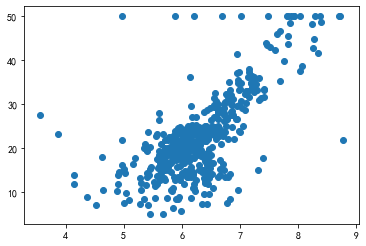

In [64]:
# plot the RM with respect to y
plt.scatter(X_rm,y)

Gradient descent
- Assume that the target funciton is a linear function

In [65]:
#define target function
def price(rm, k, b): 
   return k * rm + b

In [67]:
# define mean-squre loss function 
def loss(y,y_hat): 
   return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [68]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
   n = len(y) 
   gradient = 0 
   for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)): 
       gradient += (y_i-y_hat_i) * x_i 
   return -2/n * gradient
def partial_derivative_b(y, y_hat): 
   n = len(y) 
   gradient = 0 
   for y_i, y_hat_i in zip(list(y),list(y_hat)): 
       gradient += (y_i-y_hat_i) 
   return -2 / n * gradient

In [72]:
#initialized parameters
k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100
learning_rate = 0.0015
iteration_num  = 50000
losses = []
# 迭代计算梯度和更新后的下一轮参数
for i in range(iteration_num): 
    
   price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y} 
    
   current_loss = loss(y, price_use_current_parameters) 
   losses.append(current_loss) 
   if i % 1000 == 0:  
       print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b)) 
    
   k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters) 
   b_gradient = partial_derivative_b(y, price_use_current_parameters) 
    
   k = k + (-1 * k_gradient) * learning_rate 
   b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 259764.83322246702, parameters k is 69.06311596499992 and b is 96.38399282783433
Iteration 1000, the loss is 205.1001833579522, parameters k is -8.896278718666826 and b is 79.81924736625801
Iteration 2000, the loss is 193.85946303892933, parameters k is -8.258619847177053 and b is 75.76302403479235
Iteration 3000, the loss is 183.40112093370786, parameters k is -7.643552379049072 and b is 71.8505072861153
Iteration 4000, the loss is 173.67070184261564, parameters k is -7.0502759309922824 and b is 68.07660578766242
Iteration 5000, the loss is 164.61754076453076, parameters k is -6.478018476228573 and b is 64.43640858599146
Iteration 6000, the loss is 156.19449909094197, parameters k is -5.926035339858922 and b is 60.92517871619096
Iteration 7000, the loss is 148.3577191614699, parameters k is -5.393608229822769 and b is 57.53834703769822
Iteration 8000, the loss is 141.06639590284877, parameters k is -4.880044302189306 and b is 54.27150628850712
Iteration 9000, 

In [74]:
print(best_k,best_b,losses[-1])

6.02872519025504 -15.120463793325927 48.30999162714287


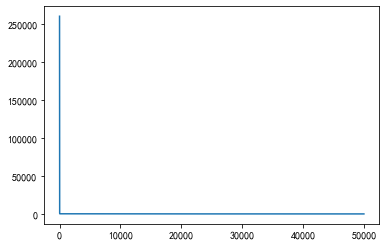

In [75]:
# 损失函数大小，一开始直线下降
plt.plot(list(range(iteration_num)),losses)

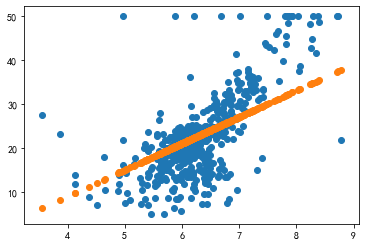

In [76]:
# 使用最好的参数预测回归结果
# price(r, best_k, best_b)
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]
plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)